In [2]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [3]:
engine = create_engine('postgresql://postgres:@localhost:5432/Pewlett_Hackard_db')
conn = engine.connect()


In [4]:
salary_data =pd.read_sql("SELECT * FROM salaries", conn)

In [5]:
engine = create_engine('postgresql://postgres:      @localhost:5432/Pewlett_Hackard_db')

In [6]:
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


Text(0.5, 1.0, 'Salary Range of Employees')

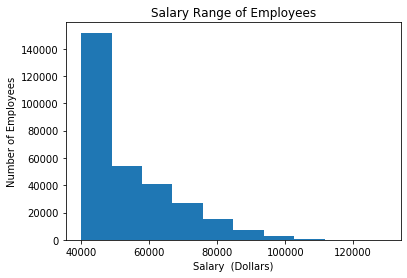

In [7]:
salary = salary_data.salary
plt.hist(salary)
plt.xlabel('Salary  (Dollars)')
plt.ylabel('Number of Employees')
plt.title('Salary Range of Employees')

In [8]:
avg_salary =pd.read_sql('''SELECT title.title, ROUND(AVG(salaries.salary),2) as avg_salary 
                            FROM employees 
                            JOIN salaries 
                            ON employees.emp_no = salaries.emp_no
                            JOIN title 
                            ON employees.emp_title = title.title_id
                            GROUP BY title.title
                            ORDER BY title.title DESC''', conn)
avg_salary

,title,avg_salary
0,Technique Leader,48582.90
1,Staff,58465.38
2,Senior Staff,58550.17
3,Senior Engineer,48506.80
4,Manager,51531.04
5,Engineer,48535.34
6,Assistant Engineer,48564.43


Text(0.5, 1.0, 'Average Salary by Title')

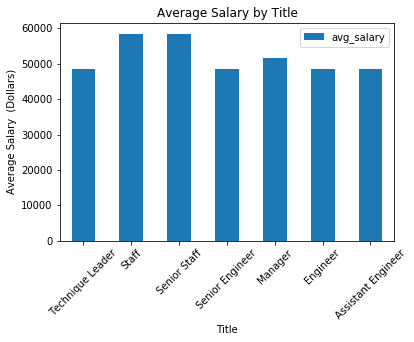

In [26]:
avg_salary_plot = avg_salary.plot(kind="bar")
avg_salary_plot.set_xticklabels(avg_salary["title"], rotation=45)
avg_salary_plot.set_xlabel("Title")
avg_salary_plot.set_ylabel("Average Salary  (Dollars)")
plt.title("Average Salary by Title")